In [ ]:
!pip install matplotlib seaborn scikit-learn numpy ipympl joblib
import warnings
warnings.filterwarnings('ignore')

# Dimension Reduction 
Working directly with high-dimensional data comes with some difficulties: 
- hard to analyze
- interpretation is difficult
- visualization is nearly impossible
- storage of the data vectors can be expensive.
However, dimension reduction can exploit the redundancy and the correlation among dimensions, ideally **accurately** and **without losing information**. We can think of dimension reduction as a **compression** technique. 

# Problem Formulation
We consider an i.i.d. data set $\mathbf X = \{\mathbf x_1, ..., \mathbf x_N\}, \mathbf x_n \in \mathbb R^D$. We want to project them into $N$ $M$-dimension vectors where $M << D$. Principal component analysis (PCA) is a **linear** algorithm for dimension reduction. Mathematically, $$\mathbf z_n = \mathbf B^\top \mathbf x_n \in \mathbb{R}^M$$where $$\mathbf B := [\mathbf b_1, \ldots, \mathbf b_M] \in \mathbb{R}^{D \times M}
$$is the projection matrix. We assume that the columns of $B$ are orthonormal so that $\mathbf{b}_i^\top \mathbf{b}_j = 0$ if and only if $i \neq j$ and $\mathbf{b}_i^\top \mathbf{b}_i = 1.$ In other words, $\mathbf b_1, \ldots, \mathbf b_M$ form a basis of the $M$-dimensional space, and $z_{in}$ is the weighted sum of $\mathbf b_i$ (each $\mathbf b$ is of length $D$) and $\mathbf x_n$. 
# Motivation 
Given the linearity framework, PCA strives to achieve two goals: 
1. Maximize the variance (the spread of the data) of the low-dimensional representation/projection of the original data (the **without losing information** aspect: Hotelling, 1933): ![](pca_mv.png)For example, PCA will likely to use $x_1$ as the principal component and discard $x_2$ because $x_1$ (or some small change to it) maximizes the variance. 
2. Minimize the reconstruction error in terms of the squared distance between $\mathbf {x}$ and  $\mathbf {\tilde x}$ (the **accuracy** aspect: Pearson, 1901): $$\frac{1}{N} \sum_{n=1}^N \|\mathbf x_n - \tilde{\mathbf x}_n\|^2$$
**It turns out that there is a *unique* solution that is the key to satisfy both aspects.**

# Maximizing Variance
The objective is to maximize the variance of the projection $\mathbf z_n := [z_{1n}, \ldots, z_{Mn}]$, which are coordinates/codes of a set of $M$ orthonormal basis. In other words, the problem is to choose a subspace that maximize the total variance. 

Since the basis are orthogonal, the total variance of the $\mathbf x_n$'s projections to a $M$-dimensional space is the sum of projection variance to each base vector. $$V_{total} = \sum_{i=1}^M {V_i}$$
Therefore, we can break down the problem by finding the $M$-largest orthonormal vectors as the basis of the subspace. 

We start by seeking vector $\mathbf b_1$ that maximizes the variance of the projection of $\mathbf x_n$ to $\mathbf b_1$, which is the first coordinate of $\mathbf x_n$'s projection $\mathbf z_n$: 
$$z_{1n} = \mathbf b_1^T \mathbf x_n \tag {1}$$
Recall that the projection of one vector on to another is $proj_{\mathbf b_1}{\mathbf x_n} = \frac{\mathbf{x_n} \cdot \mathbf{b_1}}{\|{\mathbf{b_1}}\|^2} \mathbf{b_1}$. We assume $\mathbf b_1$ is a unit vector, i.e. $\|{\mathbf{b_1}}\|^2 = 1$, and $z_{1n}$ is the coordinate in the direction of $\mathbf b_1$, we can omit $\mathbf b_1$ in the end. 

By exploiting the i.i.d assumption of data ($Var(\mathbf x_i + \mathbf x_j) = Var(\mathbf x_i) + Var(\mathbf x_j)$), and without loss of generality, by assuming $\mathbb{E}_\mathbf x[\mathbf x] = 0$ (see [Step 1 Center the data](#Step%201%20Center%20the%20data)), we obtain:
$$V_1 := V[z_1] = \frac{1}{N} \sum_{n=1}^N z_{1n}^2$$
By substitution using (1): 
$$\begin{align}
V_1 &= \frac{1}{N} \sum_{n=1}^N (\mathbf {b}_1^ \top \mathbf x_n)^2 = \frac{1}{N} \sum_{n=1}^N \mathbf {b}_1^\top \mathbf x_n \mathbf {x}_n^\top \mathbf b_1  \\
&= \mathbf {b}_1^\top \left( \frac{1}{N} \sum_{n=1}^N \mathbf x_n \mathbf {x}_n^\top\right) \mathbf b_1 = \mathbf{b}_1^\top \mathbf S \mathbf b_1
\end{align}
$$
Where $S$ is the covariance matrix of $\mathbf X$ (again, we here assume $\mathbb{E}_\mathbf x[\mathbf x] = 0$).
To maximize $V_1$, $\mathbf b_1$ is the eigenvector associated with largest eigenvalue $\lambda_1$ of $\mathbf S$ ($\mathbf S\mathbf b_1 = \lambda_1\mathbf b_1$), and $V_1 = \lambda_1$. Since we assume $\mathbf b_1$ to be a unit vector, $\mathbf b_1$ becomes the first orthonormal base of the subspace $U$ inside $\mathbb R^D$. Using this method, we find the first principal component.

We then subtract out the variance that already explained by the $\mathbf b_1$ direction and this gets us a new covariance matrix $\mathbf {\hat S}$, which has the same eigenvectors and eigenvalues as $\mathbf S$, except that the eigenvalue associated with $\mathbf b_1$ is 0. So again, we select the eigenvector $\mathbf b_2$ that associates with the largest eigenvalue $\lambda_2$. By induction, the first $M$ eigenvectors of $\mathbf S$ (ranked by their associating eigenvalues) are the orthonormal vectors that form the basis of the subspace $U$ we want that maximizes the total projection variance.

Therefore, we can find all principal components in parallel by first calculating the covariance matrix $\mathbf S$, and applying eigen-decomposition and extracting the first $M$ eigenvalues and eigenvectors.  

## Step 1: Data Preprocessing 
### Center the data?
In principle, we don't need to center the data, as the variance we are maximizing does not depend on $\mathbf {\bar X}: \operatorname{Var}(\mathbf z) = \operatorname{Var}(\mathbf{B}^{\top}(\mathbf{x} - \boldsymbol{\mu})) = \operatorname{Var}(\mathbf{B}^{\top}\mathbf{x} - \mathbf{B}^{\top}\boldsymbol{\mu}) = \operatorname{Var}(\mathbf{B}^{\top}\mathbf{x})$. 

We will also verify this in the example shown later, where we compare the result of applying PCA to both non-centered $\mathbf X$ and centered $\mathbf X ^ \prime$. But in a lot of tutorials they ask you to center the data by subtracting $\bar x_i, i=1, \dots, D$, $D$ is the number of dimensions. Why? Because people often either use $\mathbf X^T\mathbf X/(n−1)$ to calculate covariance matrix (by omitting the sample mean which effectively assuming mean=0) or they use singular value decomposition to calculate PCs directly, which assumes the data is centered. Either way, it is always safer to center the data. Often in implementation there is library function you can call to center and standardize the data at the same time.
### Standardize the data?
Standardization divides the data by standard deviation $\sigma_i, i=1, \dots, D$ so that each dimension is unit free and has variance 1. This step is necessary (unlike the centering part), because recall that the PCA's goal is to maximize the variance. If a certain dimension in $\mathbf X$ is disproportionally large in magnitude, the variance PCA in turn try to maximize will  disproportionally be biased towards this dimension. For example, if dimension $i$ is measuring length in meter, its variance will be 10000 more by changing its unit to centimeters. In short, unit in data games the PCA system. Standardization prevents this. 

A nice feature that comes with standardization is it turns the covariance matrix $\mathbf S$ into correlation matrix $\mathbf C$: recall that $$Corr = \frac{\text{Cov}(X_i, X_j)}{\sqrt{\text{Var}(X_i) \text{Var}(X_j)}} = \text{Cov}(X_i, X_j)​.$$Since each $\mathbf x$ is unit variance. 

And we know that principal components are orthogonal, i.e., they are not correlated, we can interpret PCA as effectively *de-correlating* the original $D$ dimensions of the data matrix $\mathbf X$, which circles back to what we've discussed in [Dimension Reduction](#Dimension%20Reduction).  

In [ ]:
# Step-by-step to perform PCA, and later we will compare the result of this step-by-step with the library implementation of PCA
## Step 0: Get data 
from sklearn import datasets
# iris is a dataset that quantifies the morphologic variation of Iris flowers of three related species
iris = datasets.load_iris()
# X: the length and the width of the sepals and petals
X = iris['data']
# Y: 3 iris species: setosa, virginica, versicolor
Y = iris['target']
X.shape, Y.shape

In [ ]:
# Step 1: Data Preprocessing 
# Before preprocessing 
print(f"Before preprocessing: Average length of sepals: {X[:,0].mean()}")
print(f"Before preprocessing: Average length of sepals: {X[:,0].var()}")
# center and standardize the data 
from sklearn.preprocessing import StandardScaler
std_X = StandardScaler().fit_transform(X)
# After standarization
print(f"After preprocessing: Average length of sepals: {std_X[:,0].mean()}")
print(f"After preprocessing: Average length of sepals: {std_X[:,0].var()}")

In [ ]:
# Step 2: Calculate the Covariance Matrix
import numpy as np
cov_matrix = np.cov(std_X, rowvar=False)
# or manually: we can use this formula to calculate covariance because we already centered the data
cov_matrix_manual = (std_X.T @ std_X) / (std_X.shape[0] - 1)
np.isclose(cov_matrix, cov_matrix_manual)

In [5]:
# Step 3: Eigen-Decomposition
from scipy.linalg import eigh
values, vectors = eigh(cov_matrix)
print(f"eigenvalues in ascending order (aka, the projection variance): {values}")
# it seems like the first two pc already did pretty well 
pcs = vectors[:,2:]
# turn the ascending order into descending
pcs = np.flipud(pcs.T)

eigenvalues in ascending order (aka, the projection variance): [0.02085386 0.14774182 0.9201649  2.93808505]


In [6]:
## Step 4: Mapping data to subspace U
from matplotlib import pyplot as plt
new_coordinates_manual = (pcs @ std_X.T).T

In [7]:
# Compare the result we got from step-by-step manual computation with using library code
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
# we already centered and standardized the data, so we can go to step 3 and 4 directly
new_coordinates = pca.fit_transform(std_X) # fit: our step 3; transform: our step 4

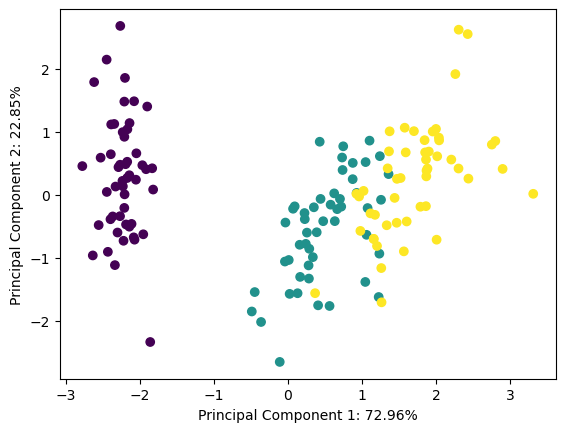

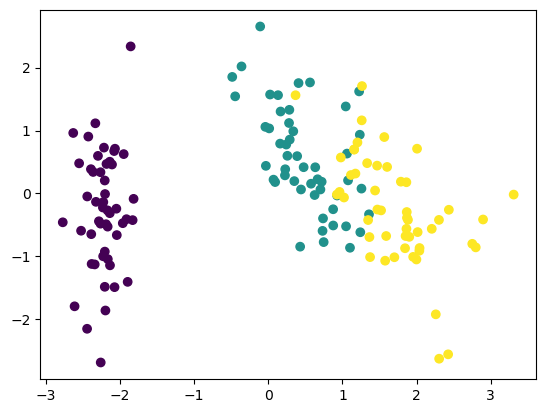

In [8]:
# result using lib 
plt.scatter(new_coordinates[:, 0], new_coordinates[:, 1], c=Y)
plt.xlabel(f'Principal Component 1: {round(pca.explained_variance_ratio_[0]*100, 2)}%')
plt.ylabel(f'Principal Component 2: {round(pca.explained_variance_ratio_[1]*100, 2)}%')
plt.show()
# result using manual step-by-step computation
plt.scatter(new_coordinates_manual[:, 0], new_coordinates_manual[:, 1], c=Y)
plt.show()

After We know how PCA works. We may wonder: all is great, but what's next (how can it help downstream tasks)? The following will apply to not only PCA, but any dimension reduction techniques (UMAP, t-SNE)
- Visualization 
- Clustering 
- Feature Analysis
- Classification (PCA as feature extraction technique)
- Anomaly detection

In [9]:
# Classification 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

## Classification based on first 2 pcs 
pca = PCA(n_components=4)
new_coordinates = pca.fit_transform(std_X)[:, :2]
X_train, X_test, y_train, y_test = train_test_split(new_coordinates, Y, test_size=0.2, random_state=40)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print("Logistic Regression Accuracy based on first 2 PC:", accuracy_score(y_test, y_pred))
print("Linear SVM based on first 2 PC:", accuracy_score(y_test, y_pred))

## Classification based on last 2 pcs 
pca = PCA(n_components=4)
new_coordinates = pca.fit_transform(std_X)[:, 2:4]
X_train, X_test, y_train, y_test = train_test_split(new_coordinates, Y, test_size=0.2, random_state=40)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print("Logistic Regression Accuracy based on last 2 PC:", accuracy_score(y_test, y_pred))
print("Linear SVM based on last 2 PC:", accuracy_score(y_test, y_pred))
pca = PCA(n_components=2)
new_coordinates = pca.fit_transform(std_X)

## Classification based on all original variables
X_train, X_test, y_train, y_test = train_test_split(std_X, Y, test_size=0.2, random_state=40)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print("Logistic Regression Accuracy based on all variables:", accuracy_score(y_test, y_pred))
print("Linear SVM on all variables:", accuracy_score(y_test, y_pred))

Logistic Regression Accuracy based on first 2 PC: 0.9333333333333333
Linear SVM based on first 2 PC: 0.9333333333333333
Logistic Regression Accuracy based on last 2 PC: 0.4
Linear SVM based on last 2 PC: 0.4
Logistic Regression Accuracy based on all variables: 1.0
Linear SVM on all variables: 1.0


# PCA vs classification 
Does PCs that explain a large portion of variance can be used automatically as inputs to your favourite classfier? 
- Relevance to Target: PCA maximizes variance without considering the target variable. For classification, it’s crucial to ensure that the selected components are relevant to the target. After applying PCA, you can use feature selection techniques to further refine the components based on their relevance (correlation to the target variable, i.e., class) to the classification task.
- Interpretability: While PCA reduces dimensionality, the resulting components are linear combinations of original features, which might reduce interpretability. It’s essential to balance dimensionality reduction and interpretability in practical applications.

For examples, see redox_pca.ipynb.

In short, $variance \neq separation$ 

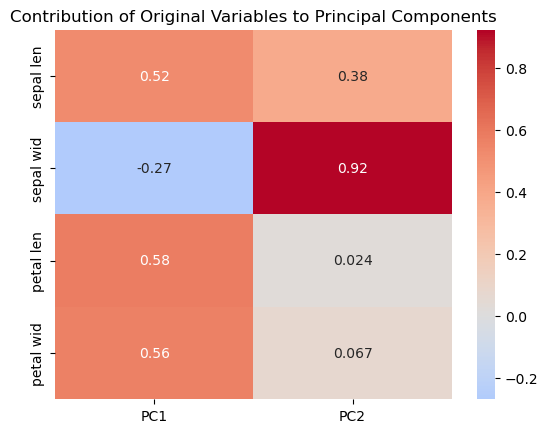

In [10]:
# Feature Analysis
## Plotting Contribution of Original Variables to Principal Components: unique to PCA
import pandas as pd
import seaborn as sns
loadings = pca.components_.T
loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=["sepal len", "sepal wid", "petal len", "petal wid"])
sns.heatmap(loadings_df, annot=True, cmap='coolwarm', center=0)
plt.title('Contribution of Original Variables to Principal Components')
plt.show()

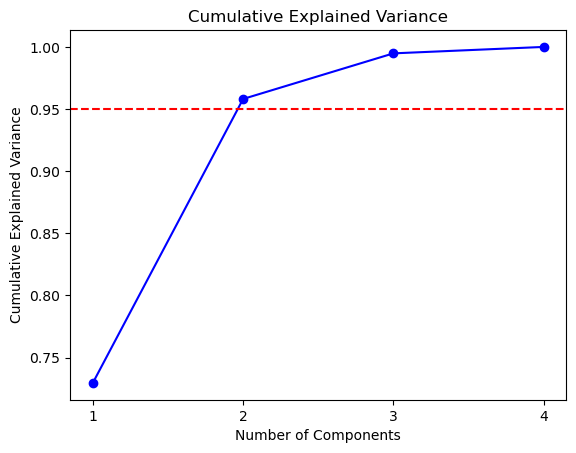

In [11]:
## Plot cumulative explained variance in terms of number of PCs
# let number of PCs = number of features: so that we can have the cumulative distribution of explained variances
pca2 = PCA(n_components=std_X.shape[1])
pca2.fit(std_X)
cumulative_explained_variance = np.cumsum(pca2.explained_variance_ratio_)
x_values = np.arange(1, len(cumulative_explained_variance) + 1)
plt.plot(x_values, cumulative_explained_variance, marker='o', linestyle='-', color='b')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(x_values)
# Optionally, add a horizontal line to mark a specific threshold, e.g., 95% variance explained
threshold = 0.95
plt.axhline(y=threshold, color='r', linestyle='--')
plt.show()

# case study 
- [Investigation of Fiber-Optic Probe Designs for Optical Spectroscopic Diagnosis of Epithelial Pre-Cancers](https://pubmed.ncbi.nlm.nih.gov/14755422/)

## Manipulation over time
left cheek (treatment), right cheek (control); day 0, day biopsy.

## Data
39 spectral lines, each of dimension 51 (5nm from 300 - 550)

## Data analysis pipeline
1. each conducted a pca, retaining PCs so that the explained variances >= 0.95

2. Use some hypothesis testing techniques (e.g. Unpaired Wilcoxon Rank Sum Tests) to find PCs that have Statistically Significant Differences Between Tissue Diagnosed With Dysplasia/CIS and Normal Tissues in the bio 

3. Use those PCs as input features to classification algorithm 

# Projecting back
We may also want to project the $\mathbf z_n$ back to $\mathbf {\tilde x_n} = \mathbf B \mathbf z_n=\mathbf B \mathbf B ^\top \mathbf x_n \in \mathbb R^D$ , which live in a lower dimensional subspace $U \subseteq \mathbb R^D, dim(U) = M$. For example, if $D = 3, M = 2$, then $\mathbf {\tilde x_n}$ and $\mathbf z_n$ are both projections of $\mathbf x_n$s: $\mathbf {\tilde x_n}$ are 3D vectors that lie in the 2D plane $U$, whereas $\mathbf z_n$ are 2D vectors. They are both projections, but one is viewed in the coordinate system of $\mathbb R^D$, the other one is viewed in terms of the subspace $U$, specifically its orthonormal basis $\mathbf b_1, \ldots, \mathbf b_M$. 

The reason we are using $\mathbf B$ to project back is because it minimizes the euclidean distance between $\mathbf {x_n}$ and $\mathbf {\tilde x_n}$, aka, the reconstruction error. 

We can think of PCA as a linear encoder $\mathbf B^\top$ that maximizes the variance and a linear decoder that minimizes the error.

# Limitations of PCA
- **Assumption of Linearity**. Recent success in Machine learning, specifically in deep learning, in some sense is solely depends on its ability to learn to model extremely complex non-linear functions. For example, if the original data points are in $\mathbb R^3$ , and we choose $M=2$, PCA will get us the optimal 2D plane that maximizes the projection variance and minimizes the reconstruction error. All good. But there must exists a "curly plane" or some much more complex structure that can account for more variance and has lower error. 
- **Variance as Information**: Variance is the bread and butter to PCA. What if the variance is "contaminated" by noise?

In [61]:
# Let us try PCA on MNIST data
import os
import joblib
from sklearn.datasets import fetch_openml

# Define the file path for caching
dataset_path = 'mnist_784.pkl'

# Function to fetch and save the dataset
def fetch_and_cache_mnist(dataset_path):
    if os.path.exists(dataset_path):
        # Load the dataset from the file
        mnist = joblib.load(dataset_path)
        print("Loaded dataset from cache.")
    else:
        # Fetch the dataset from the server
        mnist = fetch_openml('mnist_784', version=1, as_frame=False)
        # Save the dataset to the file
        joblib.dump(mnist, dataset_path)
        print("Fetched and cached the dataset.")
    return mnist

# Fetch and cache the dataset
mnist = fetch_and_cache_mnist(dataset_path)

# Use the dataset
X, y = mnist.data, mnist.target
from sklearn.utils import resample
X_sample, y_sample = resample(X, y, n_samples=2000, random_state=42, stratify=y)

Loaded dataset from cache.


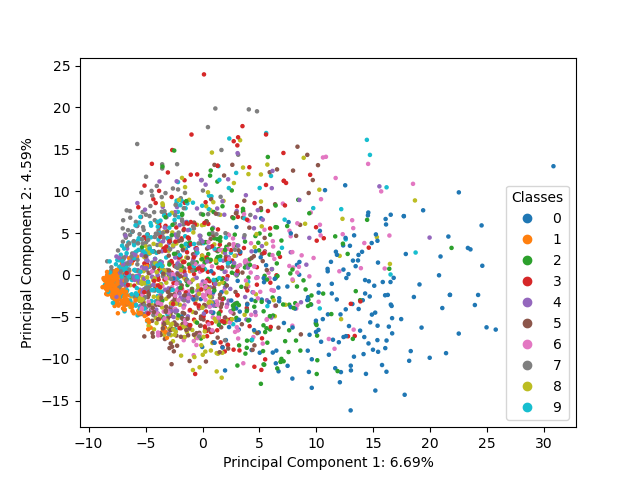

In [63]:
# perform pca and plot it 
std_mnist = StandardScaler().fit_transform(X_sample)
pca_mnist = PCA(n_components=2)
mnist_2d = pca_mnist.fit_transform(std_mnist) 
scatter = plt.scatter(mnist_2d[:, 0], mnist_2d[:, 1], c=y_sample.astype(int), cmap='tab10', label=y_sample.astype(int), s=5)
plt.xlabel(f'Principal Component 1: {round(pca_mnist.explained_variance_ratio_[0]*100, 2)}%')
plt.ylabel(f'Principal Component 2: {round(pca_mnist.explained_variance_ratio_[1]*100, 2)}%')
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()

# as we can see, the separation is quite bad. The two pcs in total only explain 10% of the variance. 

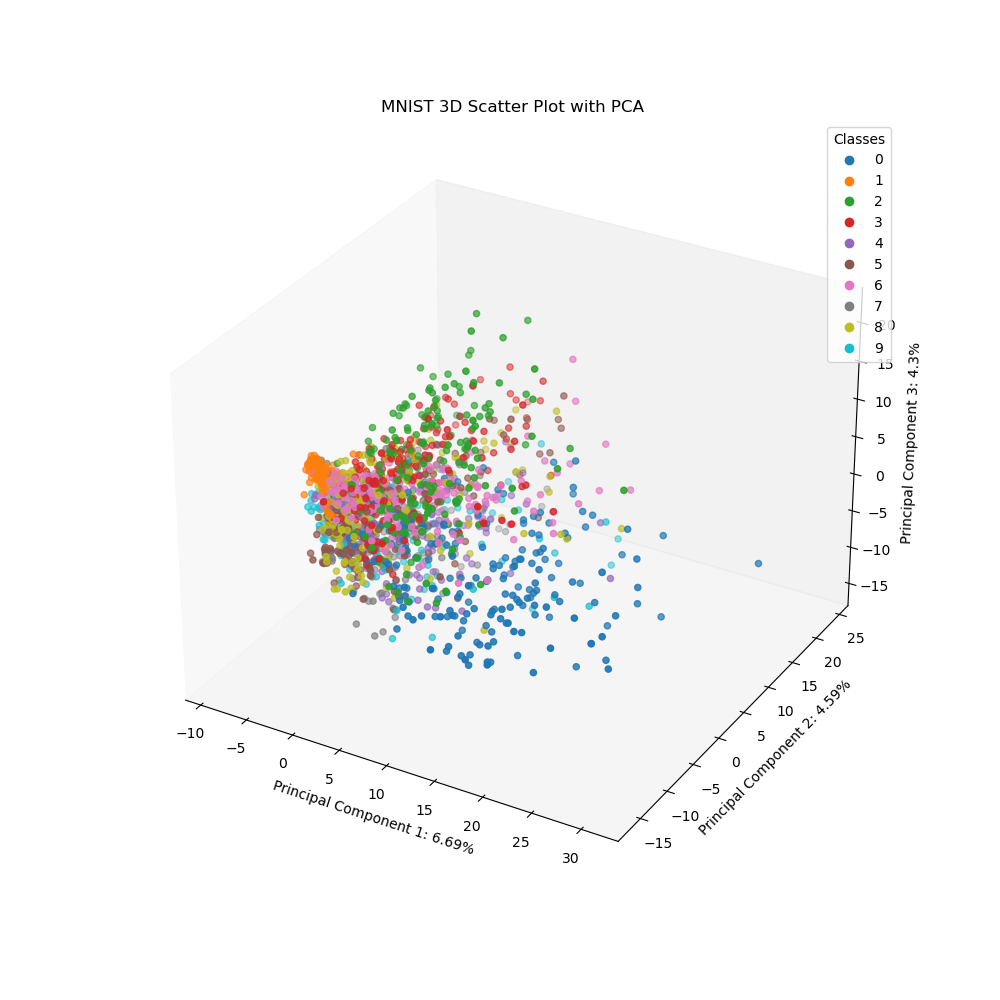

In [47]:
# does using 3 PCs help, i.e. a 3d plot 
%matplotlib widget
pca_mnist_3d = PCA(n_components=3)
mnist_3d = pca_mnist_3d.fit_transform(std_mnist) 
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(mnist_3d[:, 0], mnist_3d[:, 1], mnist_3d[:, 2], c=y_sample.astype(int), cmap='tab10', label=y_sample.astype(int))
legend_elements, _ = scatter.legend_elements()
ax.legend(legend_elements, np.unique(y), title="Classes", loc="upper right")
ax.set_xlabel(f'Principal Component 1: {round(pca_mnist_3d.explained_variance_ratio_[0]*100, 2)}%')
ax.set_ylabel(f'Principal Component 2: {round(pca_mnist_3d.explained_variance_ratio_[1]*100, 2)}%')
ax.set_zlabel(f'Principal Component 3: {round(pca_mnist_3d.explained_variance_ratio_[2]*100, 2)}%')
ax.grid(False)
ax.set_title('MNIST 3D Scatter Plot with PCA')
plt.show()
# any alternatives?